In [ ]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

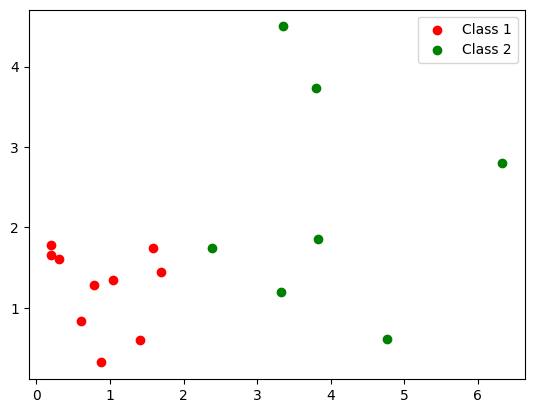

In [ ]:
def data_points(n_samples, class_point, noise=1):
    def offset_point():
        offset_x = randint(-100 * noise, noise * 100) / 100
        offset_y = randint(-100 * noise, noise * 100) / 100
        x = class_point[0] + offset_x
        y = class_point[1] + offset_y
        return x, y

    points = [offset_point() for _ in range(n_samples)]
    x_list = [points[i][0] for i in range(n_samples)]
    y_list = [points[i][1] for i in range(n_samples)]

    return x_list, y_list

x1_list, y1_list = data_points(n_samples=10, class_point=(1, 1), noise=0.9)
x2_list, y2_list = data_points(n_samples=7, class_point=(4, 2.5), noise=2.5)

plt.scatter(x=x1_list, y=y1_list, color='red', label="Class 1")
plt.scatter(x=x2_list, y=y2_list, color='green', label="Class 2")
plt.legend()
plt.show()

In [ ]:
X1 = np.array([x1_list, y1_list]).T  # Матрица X1: точки класса 1
X2 = np.array([x2_list, y2_list]).T  # Матрица X2: точки класса 2

print("Матрица X1:\n", X1)
print("Матрица X2:\n", X2)

Матрица X1:
 [[1.7  1.45]
 [0.31 1.61]
 [1.41 0.6 ]
 [0.78 1.28]
 [0.2  1.78]
 [1.58 1.74]
 [0.88 0.32]
 [1.04 1.35]
 [0.61 0.83]
 [0.2  1.66]]
Матрица X2:
 [[3.32 1.2 ]
 [3.8  3.73]
 [6.33 2.8 ]
 [4.76 0.61]
 [2.39 1.74]
 [3.83 1.85]
 [3.35 4.5 ]]


Точность модели: 1.00


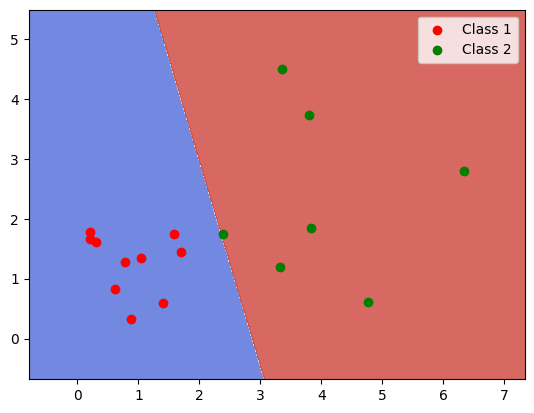

In [ ]:
# Метки классов
y1 = [0] * len(X1)  # Класс 0
y2 = [1] * len(X2)  # Класс 1

X = np.vstack((X1, X2))  # Объединяем точки
y = np.array(y1 + y2)    # Объединяем метки

# Обучение модели логистической регрессии
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(X, y)

# Оценка модели
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# График классификации
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Class 2')
plt.legend()
plt.show()